In [112]:
import pandas as pd
import numpy as np

In [113]:
df=pd.read_csv('/content/E-Commerce Shipping Data.csv')

In [114]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [115]:
df.shape

(10999, 12)

In [116]:
df.duplicated().sum()

0

In [117]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [118]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [119]:
df.drop(['ID'],axis=1,inplace=True)

In [120]:
cat=[]
num=[]
for i in df:
  try:
    float(df[i].mode().iloc[0])
    num.append(i)
  except:
    cat.append(i)

In [121]:
cat

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [122]:
num

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-124-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

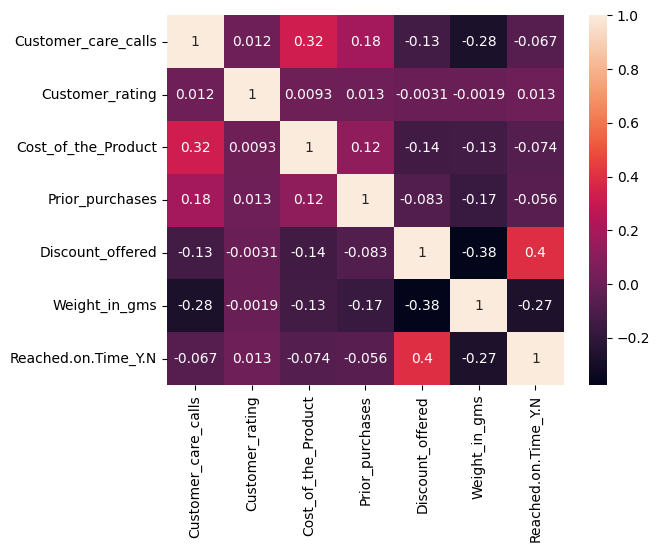

In [124]:
sns.heatmap(df.corr(),annot=True)

In [125]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


##Categorical Column's unique values



In [126]:
for i in cat:
  print(i)
  print(df[i].nunique())
  print(df[i].unique())
  print()

Warehouse_block
5
['D' 'F' 'A' 'B' 'C']

Mode_of_Shipment
3
['Flight' 'Ship' 'Road']

Product_importance
3
['low' 'medium' 'high']

Gender
2
['F' 'M']



##Perform Outlier Analysis and remove them:

In [127]:
# for i in num:
#   if i != 'Reached.on.Time_Y.N':
#     q1=df[i].quantile(0.25)
#     q3=df[i].quantile(0.75)
#     iqr=q3-q1
#     vl=q1-iqr*1.5
#     ul=q3+iqr*1.5
#     df=df[(df[i]>=vl)&(df[i]<=ul)]

In [128]:
df.shape

(10999, 11)

In [129]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


##Applying Scaling and Encoding:




In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [131]:
for i in num:
  if i != 'Reached.on.Time_Y.N':
    df[i]=sc.fit_transform(df[[i]])



In [132]:
df=pd.get_dummies(df,drop_first=True)

In [133]:
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,1,0,0,1,0,0,0,1,0,0
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,1,0,0,0,1,0,0,1,0,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,1,0,0,0,0,0,0,1,0,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,1,1,0,0,0,0,0,0,1,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730,1,0,0,0,0,0,1,0,1,0
10995,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679,0,1,0,0,0,0,1,0,1,0
10996,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937,0,0,1,0,0,0,1,1,0,0
10997,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304,0,0,0,0,1,0,1,0,1,1


## Defining x and y :
here x= Featurs and y= target value

In [134]:
x=df.drop(['Reached.on.Time_Y.N'],axis=1)
y=df['Reached.on.Time_Y.N']

In [135]:
from sklearn.model_selection import train_test_split

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

##Appling logisticRegression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [167]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [168]:
y_pred=log.predict(x_test)

In [169]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       898
           1       0.71      0.67      0.69      1302

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.64      2200
weighted avg       0.65      0.64      0.65      2200



## Appling DecessionTree

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [171]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)


DecisionTreeClassifier()

In [172]:
y_pred1=dec.predict(x_test)

In [173]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       898
           1       0.68      0.69      0.69      1302

    accuracy                           0.63      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.63      0.63      0.63      2200



##Appling Randomforestclassifier

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [175]:
Rand=RandomForestClassifier()
Rand.fit(x_train,y_train)

RandomForestClassifier()

In [176]:
y_predict=Rand.predict(x_test)

In [177]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63       898
           1       0.76      0.63      0.69      1302

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200



So I got to know that the best model for this predicted value is RandomForestClassifier with accuracy 66%.